### 6.2_ Explore relationships

In [5]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# Create path 
path = r'/Users/milenafagandini/Desktop/Airbnb /02 Data '

In [9]:
airbnb = pd.read_csv(os.path.join(path, 'dataset.csv'), index_col = False)

In [11]:
airbnb.shape

(35172, 14)

In [13]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [15]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [17]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,67518.0,3,44,1,300,5
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,Mar√≠a,Palermo,-34.586170,-58.410360,Entire home/apt,22375.0,7,123,6,44,8
2,15074,ROOM WITH RIVER SIGHT,59338,Monica,Nu√±ez,-34.538920,-58.465990,Private room,NaN,29,0,1,0,0
3,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,52511.0,2,45,9,365,0
4,20062,PENTHOUSE /Terrace & pool /City views /2bedrooms,75891,Sergio,Palermo,-34.581848,-58.441605,Entire home/apt,113360.0,2,330,4,209,25


In [19]:
# Check for missing values
airbnb.isnull().sum() # No missing values!

id                                   0
name                                 0
host_id                              0
host_name                            6
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3574
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [21]:
# Calculate the mean of the 'price' column (ignoring NaNs)
price_mean = airbnb['price'].mean()

# Replace missing values in the 'price' column with the calculated mean
airbnb['price'].fillna(price_mean, inplace=True)

# Verify that there are no more missing values in 'price'
print("Missing values in 'price':", airbnb['price'].isnull().sum())


Missing values in 'price': 0


/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_29192/1773104513.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['price'].fillna(price_mean, inplace=True)


In [37]:

# Step 1: Inspect a sample of the price column
print("Original price values:")
print(airbnb['price'].head(20))

# Step 2: Force conversion to string and remove unwanted characters
airbnb['price'] = airbnb['price'].astype(str)
# Remove any character that is not a digit or a dot
airbnb['price'] = airbnb['price'].str.replace(r'[^\d.]', '', regex=True)

# Step 3: Convert to numeric, coercing errors to NaN
airbnb['price'] = pd.to_numeric(airbnb['price'], errors='coerce')

# Step 4: Check conversion results
print("Cleaned price values:")
print(airbnb['price'].head(20))
print("Unique price values:", airbnb['price'].unique())

# Step 5: Replace missing values with the mean
price_mean = airbnb['price'].mean()
airbnb['price'].fillna(price_mean, inplace=True)
print("Missing values in 'price':", airbnb['price'].isnull().sum())


Original price values:
0               67518.0
1               22375.0
2     95487.76489018292
3               52511.0
4              113360.0
5     95487.76489018292
6               30761.0
7              315065.0
8               31507.0
9               53257.0
10              72465.0
11              73515.0
12    95487.76489018292
13              26255.0
14              57762.0
15              89268.0
16              91264.0
17              52511.0
18              52511.0
19              24155.0
Name: price, dtype: object
Cleaned price values:
0      67518.00000
1      22375.00000
2      95487.76489
3      52511.00000
4     113360.00000
5      95487.76489
6      30761.00000
7     315065.00000
8      31507.00000
9      53257.00000
10     72465.00000
11     73515.00000
12     95487.76489
13     26255.00000
14     57762.00000
15     89268.00000
16     91264.00000
17     52511.00000
18     52511.00000
19     24155.00000
Name: price, dtype: float64
Unique price values: [ 67518.          2

/var/folders/x_/nvg20gdn1dggf_rxhsn2bcnh0000gn/T/ipykernel_29192/4164589782.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['price'].fillna(price_mean, inplace=True)


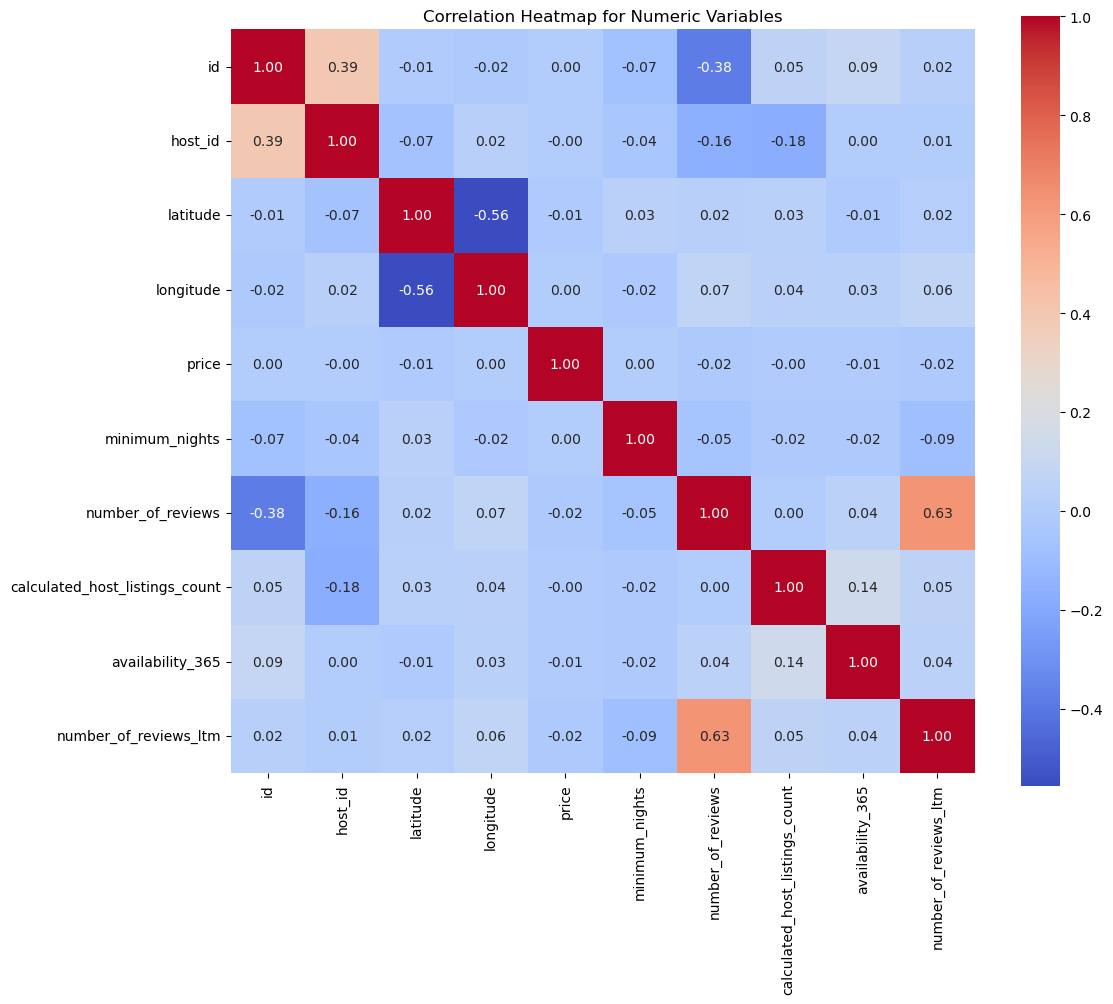

In [41]:
numeric_df = airbnb.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()


### Comments
#### Price has weak correlations with most variables, suggesting that factors like availability or review count don't strongly influence price.
####  Number of reviews and reviews in the last 12 months are highly correlated (as expected).
####  Availability is slightly negatively correlated with minimum nights, meaning that listings requiring longer stays tend to have fewer available days.
####  Host listing count and availability show some positive correlation, implying that hosts with multiple listings may keep them open for longer periods.

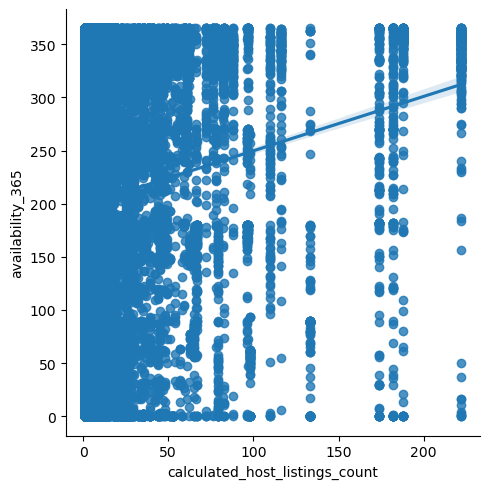

In [44]:
# Create a scatterplot for "calculated_host_listings_count" vs. "availability_365".

sns.lmplot(x = 'calculated_host_listings_count', y = 'availability_365', data = airbnb)

### Comments
#### There's a moderate positive correlation, meaning that hosts with more listings tend to have higher availability throughout the year.
#### Some hosts may manage multiple properties and keep them open for bookings most of the time.

In [47]:
# Keep only the variables you want to use in the pair plot

sub_2 = airbnb[['availability_365', 'calculated_host_listings_count', 'latitude', 'host_id', 'price']]

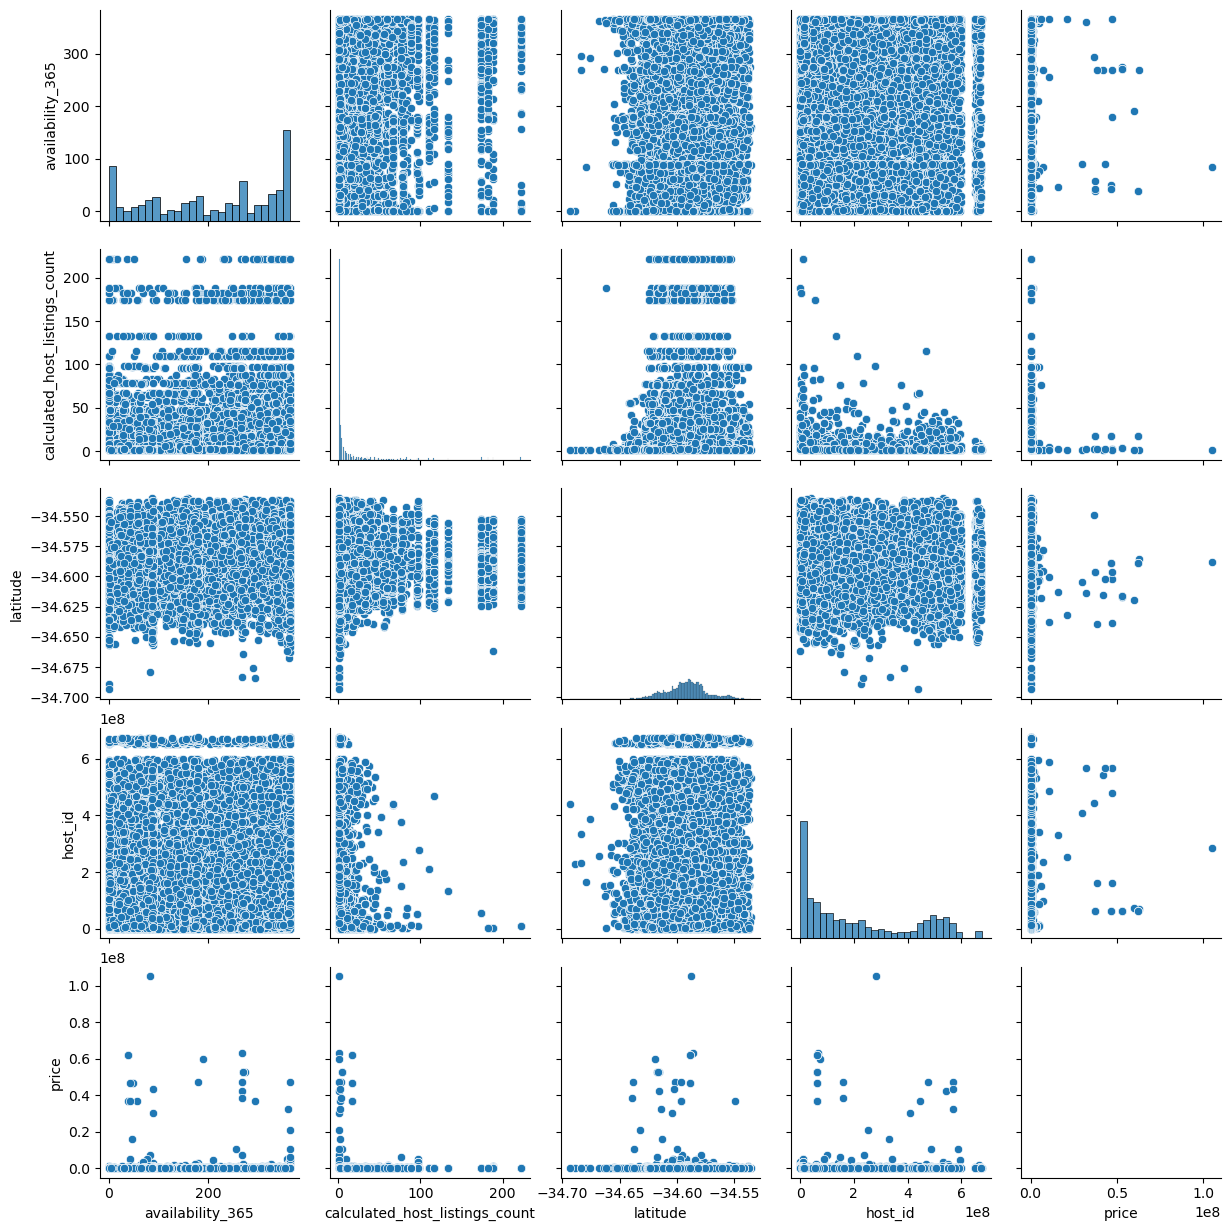

In [49]:
# Create a pair plot 

g = sns.pairplot(sub_2)

## Comments 
#### Host behavior matters: More experienced hosts with multiple listings tend to have higher availability.
#### Pricing is complex: Factors other than latitude or availability influence how hosts set their prices.
#### No dominant trends: The relationships between these variables are relatively weak, suggesting that pricing, availability, and listing strategies are driven by multiple interacting factors rather than single attributes.

### This analysis was great to see correlation between variables but it wasn't good at solving my initial questions 

## From the analysis I created few hypothesis 
### Hypothesis 1: Hosts with multiple listings tend to have higher availability
### Hypothesis 2: Price does not vary significantly with latitude
### Hypothesis 3: Hosts with More Listings May Get More Reviews